# Exercício Gráfico Fluxo.
Vocês vão utilizar um dos tipos de gráfico do tipo Fluxo (Flow).  
  
Referência: https://www.python-graph-gallery.com/  
  
Em grupo vocês devem decidir qual base aberta vão utilizar para fazer uma demonstracão de um fluxo de dados.  
  
No final da aula de hoje vocês devem ter decidido qual base utilizar e se possível uma tentatativa de como utilizar um dos gráficos de Fluxo.  
  

# Processamento dos dados e exploração

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('./trip.csv', sep=',')
df = df.drop_duplicates(subset=['trip_id'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236065 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            236065 non-null  int64  
 1   starttime          236065 non-null  object 
 2   stoptime           236065 non-null  object 
 3   bikeid             236065 non-null  object 
 4   tripduration       236065 non-null  float64
 5   from_station_name  236065 non-null  object 
 6   to_station_name    236065 non-null  object 
 7   from_station_id    236065 non-null  object 
 8   to_station_id      236065 non-null  object 
 9   usertype           236064 non-null  object 
 10  gender             146171 non-null  object 
 11  birthyear          146167 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 23.4+ MB


In [4]:
df['from_station_id'].unique()

array(['CBD-06', 'PS-04', 'CBD-07', 'PS-05', 'CBD-05', 'CH-02', 'DPD-01',
       'UD-01', 'WF-04', 'BT-04', 'UW-02', 'BT-03', 'ID-04', 'UD-02',
       'UD-04', 'CBD-13', 'FH-01', 'CH-09', 'SLU-15', 'SLU-18', 'UW-10',
       'CH-15', 'BT-05', 'SLU-01', 'UD-07', 'CBD-03', 'CH-08', 'UW-07',
       'SLU-19', 'DPD-03', 'WF-01', 'CH-05', 'SLU-02', 'CH-07', 'UW-06',
       'UW-04', 'SLU-17', 'EL-01', 'EL-05', 'CH-06', 'SLU-04', 'BT-01',
       'CH-01', 'CH-03', 'CH-12', 'EL-03', 'FH-04', 'SLU-07', 'SLU-16',
       'UW-01', 'CD-01', 'Pronto shop', 'SLU-20', 'CBD-04', 'SLU-21',
       'UW-11', 'CH-16', 'Pronto shop 2', 'SLU-22', 'WF-03', '8D OPS 02'],
      dtype=object)

In [5]:
# bad_stations = ['Pronto shop', 'Pronto shop 2','8D OPS 02']
# mascara_from = df['from_station_id'].isin(bad_stations)
# mascara_to = df['to_station_id'].isin(bad_stations)

# df = df[~mascara_from & ~mascara_to]

In [6]:
df[['from_station_id','to_station_id']].head()

,from_station_id,to_station_id
0,CBD-06,PS-04
1,CBD-06,PS-04
2,CBD-06,PS-04
3,CBD-06,PS-04
4,CBD-06,PS-04


In [7]:
crosstab_df = pd.crosstab(df['from_station_id'], df['to_station_id'])

In [8]:
crosstab_df.head()

to_station_id,8D OPS 02,BT-01,BT-03,BT-04,BT-05,CBD-03,CBD-04,CBD-05,CBD-06,CBD-07,...,UW-01,UW-02,UW-04,UW-06,UW-07,UW-10,UW-11,WF-01,WF-03,WF-04
from_station_id,,,,,,,,,,,,,,,,,,,,,
8D OPS 02,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BT-01,0,627,182,114,403,179,135,236,743,104,...,3,1,21,4,2,4,3,777,13,792
BT-03,0,301,284,79,204,187,91,365,363,54,...,0,0,17,0,1,6,0,237,6,172
BT-04,0,178,106,146,60,72,55,265,101,41,...,0,0,5,0,1,4,1,98,1,42
BT-05,0,373,154,77,220,166,67,192,193,59,...,0,2,6,2,2,2,0,184,1,93


In [9]:
## DESCONSIDERAR
df.groupby(['from_station_id', 'to_station_id']).size().to_frame()\
    .sort_values(by=0,ascending=False).head(10).reset_index().pivot(index='from_station_id', columns='to_station_id')

0                                                    
to_station_id    BT-01  CBD-13  PS-05 SLU-16 SLU-17  UD-01   WF-01   WF-04
from_station_id                                                           
BT-01              NaN  1101.0    NaN    NaN    NaN    NaN     NaN     NaN
CBD-13           962.0     NaN    NaN    NaN    NaN    NaN     NaN     NaN
CH-07              NaN     NaN    NaN  934.0    NaN    NaN     NaN     NaN
SLU-17             NaN     NaN    NaN    NaN  960.0    NaN     NaN     NaN
UD-01              NaN     NaN    NaN    NaN    NaN  880.0     NaN     NaN
WF-01              NaN     NaN  962.0    NaN    NaN    NaN  4209.0  2291.0
WF-04              NaN     NaN    NaN    NaN    NaN    NaN  1605.0  1150.0

In [10]:
top_10_estacoes = df.groupby(['from_station_id', 'to_station_id']).size().to_frame().nlargest(10, 0).reset_index()

In [11]:
top_10_estacoes

,from_station_id,to_station_id,0
0,WF-01,WF-01,4209
1,WF-01,WF-04,2291
2,WF-04,WF-01,1605
3,WF-04,WF-04,1150
4,BT-01,CBD-13,1101
5,CBD-13,BT-01,962
6,WF-01,PS-05,962
7,SLU-17,SLU-17,960
8,CH-07,SLU-16,934
9,UD-01,UD-01,880


In [12]:
from_station_mask = top_10_estacoes['from_station_id'].unique()
to_station_mask = top_10_estacoes['to_station_id'].unique()

In [13]:
set(from_station_mask)

{'BT-01', 'CBD-13', 'CH-07', 'SLU-17', 'UD-01', 'WF-01', 'WF-04'}

In [14]:
to_station_mask

array(['WF-01', 'WF-04', 'CBD-13', 'BT-01', 'PS-05', 'SLU-17', 'SLU-16',
       'UD-01'], dtype=object)

In [15]:
[*to_station_mask, *from_station_mask]

['WF-01',
 'WF-04',
 'CBD-13',
 'BT-01',
 'PS-05',
 'SLU-17',
 'SLU-16',
 'UD-01',
 'WF-01',
 'WF-04',
 'BT-01',
 'CBD-13',
 'SLU-17',
 'CH-07',
 'UD-01']

In [16]:
union_stations = set([*from_station_mask, *to_station_mask])

In [17]:
union_stations

{'BT-01',
 'CBD-13',
 'CH-07',
 'PS-05',
 'SLU-16',
 'SLU-17',
 'UD-01',
 'WF-01',
 'WF-04'}

In [18]:
matrix_data = crosstab_df.loc[union_stations,union_stations]

# Gráfico Chord
Nesse caso tentamos usar 3 bibliotecas diferentes:
- **Chord**: Nao Foi para frente porque precisaria pagar para usar
- **MNE**: conseguimos plotar o gráfico mas não ficou tão bacan
- **Plotly**: gráfico além de interativo ficou bom de interpretar

## Chord >:(

In [19]:
# !pip install chord
# !pip install requests

In [20]:
import requests
import numpy as np
from chord import Chord

In [21]:
matrix_data.values.tolist()

[[427, 158, 384, 1, 53, 384, 105, 962, 158],
 [137, 1150, 1605, 4, 2, 215, 17, 478, 36],
 [310, 2291, 4209, 4, 3, 962, 75, 347, 52],
 [9, 0, 1, 880, 3, 1, 46, 6, 2],
 [577, 23, 23, 15, 233, 71, 19, 198, 934],
 [199, 181, 737, 0, 26, 185, 26, 179, 42],
 [135, 70, 97, 25, 5, 31, 960, 264, 53],
 [1101, 792, 777, 8, 16, 301, 175, 627, 151],
 [344, 68, 65, 4, 98, 65, 73, 166, 186]]

In [22]:
Chord(matrix_data.values.tolist(), list(union_stations)).to_html('./chord.html')

## Plotly :O

In [23]:
# !pip install plotly
# !pip install colorlover
import pandas as pd
import numpy as np
import plotly.graph_objs as go
#import colorlover as cl

In [24]:
df_2 = pd.read_csv('trip.csv', sep=',')
df_2 = df_2.drop_duplicates(subset=['trip_id'])

crosstab_df_2 = pd.crosstab(df_2['from_station_name'], df_2['to_station_name'])
top_10_estacoes_2 = df_2.groupby(['from_station_name', 'to_station_name']).size().to_frame().nlargest(10, 0).reset_index()
from_station_mask_2 = top_10_estacoes_2['from_station_name'].unique()
to_station_mask_2 = top_10_estacoes_2['to_station_name'].unique()

union_stations_2 = set([*from_station_mask_2, *to_station_mask_2])

data_matrix_2 = crosstab_df_2.loc[union_stations_2,union_stations_2]
matrix = data_matrix_2.copy()

name_dict = {'Burke-Gilman Trail / NE Blakeley St & 24th Ave NE': 'Burke-Gilman Trail',
                                 'King Street Station Plaza / 2nd Ave Extension S & S Jackson St': 'King Street Station Plaza',
                                 'Lake Union Park / Valley St & Boren Ave N':'Lake Union Park',
                                 'Pier 69 / Alaskan Way & Clay St':'Pier 69',
                                 'Seattle Aquarium / Alaskan Way S & Elliott Bay Trail':'Seattle Aquarium'}

matrix.rename(columns = name_dict, index = name_dict, inplace = True)

In [25]:
#def get_spaced_colors(n, randomized=False):
#    if n > 0:
#        max_value = 255
#        interval = max_value / n
#        hues = np.arange(0, max_value, interval)
#        return cl.to_rgb(["hsl(%d,80%%,40%%)" % i for i in hues])
#    else:
#        return None


PI = np.pi


def check_square(M):
    d, n = M.shape
    if d != n:
        raise ValueError("Data array must be square.")
    return n


def moduloAB(x, a, b):
    if a >= b:
        raise ValueError("Incorrect inverval ends")
    y = (x - a) % (b - a)
    return y + b if y < 0 else y + a


def test_2PI(x):
    return 0 <= x < 2 * PI


def get_ideogram_ends(ideaogram_len, gap):
    ideo_ends = []
    left = 0
    for k in range(len(ideaogram_len)):
        right = left + ideaogram_len[k]
        ideo_ends.append([left, right])
        left = right + gap
    return ideo_ends


def make_ideogram_arc(R, phi, a=50):
    # R is the circle radius
    # Phi is a list of the ends angle coordinates of an arc
    # a is a parameter that controls the number of points to be evaluated
    if not test_2PI(phi[0]) or not test_2PI(phi[1]):
        phi = [moduloAB(t, 0, 2 * PI) for t in phi]
    length = (phi[1] - phi[0]) % 2 * PI
    nr = 5 if length <= PI / 4 else int(a * length / PI)
    if phi[0] < phi[1]:
        nr = 100

        theta = np.linspace(phi[0], phi[1], nr)
    else:
        phi = [moduloAB(t, -PI, PI) for t in phi]
        # nr = 100
        theta = np.linspace(phi[0], phi[1], nr)
    return R * np.exp(1j * theta)


def map_data(data_matrix, row_value, ideogram_length):
    n = data_matrix.shape[0]  # square, so same as 1
    mapped = np.zeros([n, n])
    for j in range(n):
        mapped[:, j] = ideogram_length * data_matrix[:, j] / row_value
    return mapped


def make_ribbon_ends(mapped_data, ideo_ends, idx_sort):
    n = mapped_data.shape[0]
    ribbon_boundary = np.zeros((n, n + 1))
    for k in range(n):
        start = ideo_ends[k][0]
        ribbon_boundary[k][0] = start
        for j in range(1, n + 1):
            J = idx_sort[k][j - 1]
            ribbon_boundary[k][j] = start + mapped_data[k][J]
            start = ribbon_boundary[k][j]
    return [
        [(ribbon_boundary[k][j], ribbon_boundary[k][j + 1]) for j in range(n)]
        for k in range(n)
    ]


def control_pts(angle, radius):
    if len(angle) != 3:
        raise ValueError("Angle must have len = 3")
    b_cplx = np.array([np.exp(1j * angle[k]) for k in range(3)])
    b_cplx[1] = radius * b_cplx[1]
    return list(zip(b_cplx.real, b_cplx.imag))


def ctrl_rib_chords(l, r, radius):
    if len(l) != 2 or len(r) != 2:
        raise ValueError("The arc ends must be elements in a list of len 2")
    return [control_pts([l[j], (l[j] + r[j]) / 2, r[j]], radius) for j in range(2)]


def make_q_bezier(b):
    if len(b) != 3:
        raise ValueError("Contaol polygon must have 3 points")
    A, B, C = b
    return (
        "M "
        + str(A[0])
        + ","
        + str(A[1])
        + " "
        + "Q "
        + str(B[0])
        + ", "
        + str(B[1])
        + " "
        + str(C[0])
        + ", "
        + str(C[1])
    )


def make_ribbon_arc(theta0, theta1):
    if test_2PI(theta0) and test_2PI(theta1):
        if theta0 < theta1:
            theta0 = moduloAB(theta0, -PI, PI)
            theta1 = moduloAB(theta1, -PI, PI)
            if theta0 * theta1 > 0:
                raise ValueError("Incorrect angle coordinates for ribbon")
        nr = int(40 * (theta0 - theta1) / PI)
        if nr <= 2:
            nr = 3
        theta = np.linspace(theta0, theta1, nr)
        pts = np.exp(1j * theta)
        string_arc = ""
        for k in range(len(theta)):
            string_arc += "L " + str(pts.real[k]) + ", " + str(pts.imag[k]) + " "
        return string_arc
    else:
        raise ValueError("The angle coords for arc ribbon must be [0, 2*PI]")


def make_layout(title):
    xaxis = dict(
        showline=False, zeroline=False, showgrid=False, showticklabels=False, title=""
    )
    yaxis = {**xaxis, "scaleanchor": "x"}
    return dict(
        title=title,
        xaxis=xaxis,
        yaxis=yaxis,
        showlegend=False,
        margin=dict(t=25, b=25, l=25, r=25),
        hovermode="closest",
        shapes=[],
    )


def make_ideo_shape(path, line_color, fill_color):
    return dict(
        line=go.layout.shape.Line(color=line_color, width=0.45),
        path=path,
        type="path",
        fillcolor=fill_color,
        layer="below",
    )


def make_ribbon(l, r, line_color, fill_color, radius=0.2):
    poligon = ctrl_rib_chords(l, r, radius)
    b, c = poligon
    return dict(
        line=go.layout.shape.Line(color=line_color, width=0.5),
        path=make_q_bezier(b)
        + make_ribbon_arc(r[0], r[1])
        + make_q_bezier(c[::-1])
        + make_ribbon_arc(l[1], l[0]),
        type="path",
        fillcolor=fill_color,
        layer="below",
    )


def make_self_rel(l, line_color, fill_color, radius):
    b = control_pts([l[0], (l[0] + l[1]) / 2, l[1]], radius)
    return dict(
        line=dict(color=line_color, width=0.5),
        path=make_q_bezier(b) + make_ribbon_arc(l[1], l[0]),
        type="path",
        fillcolor=fill_color,
        layer="below",
    )


def invPerm(perm):
    inv = [0] * len(perm)
    for i, s in enumerate(perm):
        inv[s] = i
    return inv


def make_filled_chord(M):  # ,labels):

    n = M.shape[0]
    labels = list(M.columns)
    M = M.T
    matrix = M.to_numpy()
    n = M.shape[0]
    row_sum = [np.sum(matrix[k, :]) for k in range(n)]
    gap = 2 * PI * 10e-8

    ideogram_length = 2 * PI * np.asarray(row_sum) / sum(row_sum) - gap * np.ones(n)
    ideo_colors=['rgba(213,62,79,0.75)',
             'rgba(244,109,67,0.75)',
             'rgba(253,174,97,0.75)',
             'rgba(254,224,139,0.75)',
             'rgba(255,255,191,0.75)',
             'rgba(230,245,152,0.75)',
             'rgba(171,221,164,0.75)',
             'rgba(102,194,165,0.75)',
             'rgba(50,136,189,0.75)']
    #ideo_colors = [
    #    x[:3] + "a" + x[3:-1] + ",.75" + x[-1] for x in get_spaced_colors(len(labels))
    #]
    mapped_data = map_data(matrix, row_sum, ideogram_length)
    idx_sort = np.argsort(mapped_data, axis=1)
    ideo_ends = get_ideogram_ends(ideogram_length, gap)
    ribbon_ends = make_ribbon_ends(mapped_data, ideo_ends, idx_sort)
    ribbon_color = [n * [ideo_colors[k]] for k in range(n)]
    layout = make_layout(" ")
    ribbon_info = []
    radii_sribb = [0.2] * n
    for k in range(n):
        sigma = idx_sort[k]
        sigma_inv = invPerm(sigma)
        for j in range(k, n):
            if M.iloc[k, j] == 0 and M.iloc[j, k] == 0:
                continue
            eta = idx_sort[j]
            eta_inv = invPerm(eta)
            l = ribbon_ends[k][sigma_inv[j]]
            if j == k:
                layout["shapes"].append(
                    make_self_rel(
                        l, "rgb(175,175,175)", ideo_colors[k], radius=radii_sribb[k]
                    )
                )
                z = 0.9 * np.exp(1j * (l[0] + l[1]) / 2)
                text = (
                    labels[k]
                    + " \u2b8c "
                    #+ labels[k]
                    + ": {0} viagens ".format(M.iloc[k, k])
                )
                ribbon_info.append(
                    go.Scatter(
                        x=[z.real],
                        y=[z.imag],
                        mode="markers",
                        text=text,
                        hoverinfo="text",
                        marker=dict(size=0.5, color=ideo_colors[k]),
                    )
                )
            else:
                r = ribbon_ends[j][eta_inv[k]]
                zi = 0.9 * np.exp(1j * (l[0] + l[1]) / 2)
                zf = 0.9 * np.exp(1j * (r[0] + r[1]) / 2)

                texti = (
                    labels[k]
                    + " \u2794 "
                    + labels[j]
                    + ": {0} viagens ".format(matrix[k][j])
                )
                textf = (
                    labels[j]
                    + " \u2794 "
                    + labels[k]
                    +": {0} viagens ".format(matrix[j][k])
                )

                ribbon_info.append(
                    go.Scatter(
                        x=[zi.real],
                        y=[zi.imag],
                        mode="markers",
                        text=texti,
                        hoverinfo="text",
                        marker=dict(size=0.5, color=ribbon_color[k][j]),
                    )
                )
                ribbon_info.append(
                    go.Scatter(
                        x=[zf.real],
                        y=[zf.imag],
                        mode="markers",
                        text=textf,
                        hoverinfo="text",
                        marker=dict(size=0.5, color=ribbon_color[j][k]),
                    )
                )
                r = (r[1], r[0])
                if matrix[k][j] > matrix[j][k]:
                    color_of_highest = ribbon_color[k][j]
                else:
                    color_of_highest = ribbon_color[j][k]
                layout["shapes"].append(
                    make_ribbon(l, r, "rgb(175, 175, 175)", color_of_highest)
                )
    ideograms = []
    for k in range(len(ideo_ends)):
        z = make_ideogram_arc(1.1, ideo_ends[k])
        zi = make_ideogram_arc(1.0, ideo_ends[k])
        m = len(z)
        n = len(zi)
        ideograms.append(
            go.Scatter(
                x=z.real,
                y=z.imag,
                mode="lines",
                line=dict(color=ideo_colors[k], shape="spline", width=0.25),
                text=labels[k] + "<br>" + "{0} partidas".format(row_sum[k]),
                hoverinfo="text",
            )
        )
        path = "M "
        for s in range(m):
            path += str(z.real[s]) + ", " + str(z.imag[s]) + " L "
        Zi = np.array(zi.tolist()[::-1])
        for s in range(m):
            path += str(Zi.real[s]) + ", " + str(Zi.imag[s]) + " L "
        path += str(z.real[0]) + " ," + str(z.imag[0])
        layout["shapes"].append(
            make_ideo_shape(path, "rgb(150,150,150)", ideo_colors[k])
        )

    layout["paper_bgcolor"] = "rgba(0,0,0,0)"
    layout["plot_bgcolor"] = "rgba(0,0,0,0)"
    layout["width"] = 625
    layout["height"] = 625
    data = ideograms + ribbon_info
    fig = {"data": data, "layout": layout}
    return fig

In [26]:
fig = make_filled_chord(matrix)

In [27]:
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
init_notebook_mode(connected=True)
iplot(fig)

## MNE :)

In [28]:
# !pip install mne

In [29]:
from mne.viz import plot_connectivity_circle

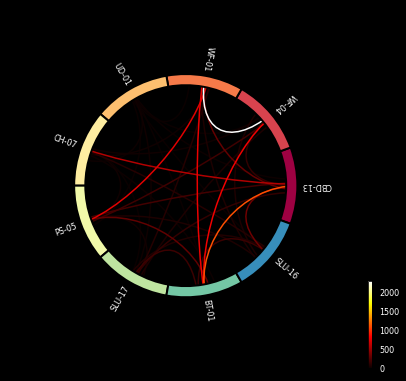

In [30]:
fig, axes = plot_connectivity_circle(matrix_data.to_numpy(), list(union_stations)) 

# Grafico Sankey

In [31]:
import plotly.graph_objects as go
import plotly.colors as color_pallete

color_dict = color_pallete.qualitative.Plotly

In [32]:
color_dict

['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52']

In [33]:
matrix_data

to_station_id,CBD-13,WF-04,WF-01,UD-01,CH-07,PS-05,SLU-17,BT-01,SLU-16
from_station_id,,,,,,,,,
CBD-13,427,158,384,1,53,384,105,962,158
WF-04,137,1150,1605,4,2,215,17,478,36
WF-01,310,2291,4209,4,3,962,75,347,52
UD-01,9,0,1,880,3,1,46,6,2
CH-07,577,23,23,15,233,71,19,198,934
PS-05,199,181,737,0,26,185,26,179,42
SLU-17,135,70,97,25,5,31,960,264,53
BT-01,1101,792,777,8,16,301,175,627,151
SLU-16,344,68,65,4,98,65,73,166,186


## Grafico de teste

In [34]:
wf01_data = matrix_data.loc['WF-01']
source_wf01 = np.full(len(wf01_data), 0).tolist()
target_wf01 = pd.factorize(wf01_data.index)[0].tolist()
value_wf01 = wf01_data.values.tolist()

In [35]:
wf04_data = matrix_data.loc['WF-04']
source_wf04 = np.full(len(wf04_data), 1).tolist()
target_wf04 = pd.factorize(wf04_data.index)[0].tolist()
value_wf04 = wf04_data.values.tolist()

In [36]:
color_test = {
    0 : 'blue',
    1 : 'red'
}

In [37]:
link_color = np.concatenate([np.full(len(wf01_data), 'blue'), np.full(len(wf04_data), 'red')]).tolist()

In [38]:
source = source_wf01 + source_wf04
target = (pd.factorize(np.concatenate([wf01_data.index.to_numpy(), wf04_data.index.to_numpy()]))[0] + 2).tolist()
value = value_wf01 + value_wf04

In [39]:
link = dict(source = source, target = target, value = value, color=link_color)
data = go.Sankey(link = link, node = dict( label = ['WF-01', 'WF-04',*wf01_data.index.to_list()]))

fig = go.Figure(data)

fig.show()

## Grafico Final

In [40]:
top_5 = df.groupby(['from_station_id', 'to_station_id']).size().to_frame().nlargest(5, 0).reset_index()
to_station_mask = top_5['to_station_id'].unique()

from_mask = df['from_station_id'] == 'WF-01'
to_mask = df['to_station_id'].isin(to_station_mask)
wf01_df = df[from_mask & to_mask].copy()

wf01_df['starttime'] = pd.to_datetime(wf01_df['starttime'])
wf01_df['stoptime'] = pd.to_datetime(wf01_df['stoptime'])

wf01_df['part_of_day'] = pd.cut(wf01_df['starttime'].dt.hour, 
        [0,6,12,18,23], 
        labels =['Night', 'Morning', 'Afternoon', 'Evening'],
        include_lowest=True)

In [41]:
sankey_data = wf01_df.groupby(['from_station_name', 'to_station_name', 'part_of_day']).size().to_frame().reset_index()
sankey_data = sankey_data.rename(columns={0:'rides'})
sankey_data.head()

,from_station_name,to_station_name,part_of_day,rides
0,Pier 69 / Alaskan Way & Clay St,2nd Ave & Pine St,Night,6
1,Pier 69 / Alaskan Way & Clay St,2nd Ave & Pine St,Morning,62
2,Pier 69 / Alaskan Way & Clay St,2nd Ave & Pine St,Afternoon,181
3,Pier 69 / Alaskan Way & Clay St,2nd Ave & Pine St,Evening,61
4,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,Night,65


In [42]:
first_half = sankey_data.groupby(['from_station_name','part_of_day']).rides.sum()\
    .reset_index().rename(columns = {'from_station_name':'from','part_of_day':'to'})

second_half = sankey_data.groupby(['part_of_day','to_station_name']).rides.sum()\
    .reset_index().rename(columns = {'part_of_day':'from','to_station_name':'to'})

sankey_processed = pd.concat([first_half, second_half], axis = 0).reset_index(drop=True)

In [43]:
from_codes, from_index = pd.factorize(sankey_processed['from'])
to_codes, to_index = pd.factorize(sankey_processed['to'])

to_dict = dict(zip(np.unique(to_codes) + 1, to_index))
from_dict = dict(zip(np.unique(from_codes), from_index))
general_dict = to_dict.copy()
general_dict.update(from_dict)

In [44]:
source = from_codes
target = to_codes + 1
value = sankey_processed['rides']

In [45]:
link_color = [color_dict[x% len(color_dict)] for x in source]

In [46]:
node_series = pd.Series(general_dict, index = general_dict.keys()).sort_index()
nodes_labels = node_series.values
node_color = [color_dict[x % len(color_dict)] for x in node_series.index]

In [47]:
link = dict(
    source = source,
    target = target,
    value = value,
    color = link_color
)
data = go.Sankey(link=link, node= dict( label = pd.Series(general_dict, index = general_dict.keys()).sort_index().values, color = node_color))

In [48]:
fig = go.Figure(data)
fig.show()